# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## HNSC


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_HNSC.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > HNSC
    
**Dependent files:**

* Target (Cancer) data: 
    - *HNSC_Interface.txt*

In [1]:
from pathlib import Path

from helpers.helpers_predator.displayers import (
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.common import load_predator

# PATHS
HNSC_PATH = Path(r"../data/Elaspic_merged_results/HNSC_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-17 09:30:47 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: HNSC

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('hnsc', HNSC_PATH)]
)

2022-06-17 09:30:50 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `hnsc` ..
2022-06-17 09:30:50 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_hnsc_data` ..
2022-06-17 09:30:51 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 09:30:51 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 09:30:51 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_hnsc data materials  ..


#### TCGA Cancer Datasets

##### HNSC

In [4]:
display_data(predator.data_materials["hnsc"])

Data dimensions: (7853, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,MH2,...,428.0,55.6903,55.9901,65.8172,65.8172,479.215,224.96,704.175,5.89685,6.78918
1,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,MH2,...,438.0,67.6915,65.6937,76.8231,76.1833,468.685,330.13,798.81,2.71793,6.60775
2,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,MH2,...,434.0,70.5775,70.5036,54.3675,54.3675,520.815,309.375,830.195,3.35892,5.43052


#### Preprocessed TCGA Cancer Datasets

##### HNSC

In [5]:
display_data(predator.data_materials["target_hnsc_data"])

Data dimensions: (7853, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,Q13485,R361H,B7Z5N5,0.8814,0.78138,0.9875,0.786567,-0.013069,0.994827,0.562232,...,428.0,55.6903,55.9901,65.8172,65.8172,479.215,224.960,704.175,5.89685,6.78918
1,Q13485,R361H,Q68DB7,0.8814,0.78138,0.8063,0.779266,-0.538397,0.994077,0.899046,...,438.0,67.6915,65.6937,76.8231,76.1833,468.685,330.130,798.810,2.71793,6.60775
2,Q13485,R361H,Q53XR6,0.8814,0.78138,1.0000,0.970443,0.302645,0.995162,0.464923,...,434.0,70.5775,70.5036,54.3675,54.3675,520.815,309.375,830.195,3.35892,5.43052


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('hnsc', HNSC_PATH)]
)

2022-06-17 09:30:56 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `hnsc` ..
2022-06-17 09:30:56 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_hnsc_data` ..
2022-06-17 09:30:56 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 09:30:56 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 09:30:56 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_hnsc data materials  ..


In [7]:
predator.predict(voting='soft')

2022-06-17 09:30:57 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-06-17 09:30:57 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-06-17 09:30:57 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-06-17 09:30:57 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-06-17 09:30:57 | DEBUG    | Predator | Predicting on hnsc cohort ..
2022-06-17 09:30:57 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)
2022-06-17 09:30:57 | DEBUG    | helpers.helpers_predator.models | X shape: (7853, 10)
2022-06-17 09:30:58 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90,
                  

In [8]:
predator.predictions.keys()

dict_keys(['hnsc_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["hnsc_prob"][:3]

[array([[0.36176491, 0.63823509],
        [0.45720809, 0.54279191],
        [0.32692748, 0.67307252],
        ...,
        [0.39674034, 0.60325966],
        [0.50038391, 0.49961609],
        [0.57805491, 0.42194509]]),
 array([[0.47504669, 0.52495331],
        [0.48412585, 0.51587415],
        [0.43886649, 0.56113351],
        ...,
        [0.6072733 , 0.3927267 ],
        [0.60030246, 0.39969754],
        [0.52055467, 0.47944533]]),
 array([[0.31155676, 0.68844324],
        [0.51452071, 0.48547929],
        [0.22890664, 0.77109336],
        ...,
        [0.32397903, 0.67602097],
        [0.25674108, 0.74325892],
        [0.69996899, 0.30003101]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2022-06-17 09:31:29 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:31:29 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort hnsc ..
2022-06-17 09:31:29 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:31:29 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with hnsc cancer dataset ..
2022-06-17 09:31:29 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 09:32:19 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 887): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.428641  P00492     R48H     Q9NRG1
1    0.519816  P00492     R48H     Q9NRG1
2    0.450506  O75175    I674M     Q9NZN8
3    0.493166  O75175    I674M     Q9NZN8
4    0.519018  O75175    I674M     Q9NZN8
2022-06-17 09:32:57 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 845): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.509738  Q04759    K400M     P27361
1    0.499161  Q04759    K400M     P27361
2    0.330979  Q14160   L1007V     Q9UDY2
3    0.330979  Q14160   L1007V     Q9UDY2
4    0.330979  Q14160   L1007V     Q9UDY2
2022-06-17 09:33:32 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1009): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.250251  Q04759    K400M     P27361
1    0.725317  Q04759    K400M     P27361
2    0

In [11]:
predator.predictions.keys()

dict_keys(['hnsc_prob', 'hnsc_predicted_probs_datasets', 'hnsc_predicted_valid_datasets', 'hnsc_predicted_invalid_datasets', 'hnsc_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["hnsc_predicted_probs_datasets"][0])

Data dimensions: (7853, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.638235,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,...,428.0,55.6903,55.9901,65.8172,65.8172,479.215,224.96,704.175,5.89685,6.78918
1,0.542792,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,...,438.0,67.6915,65.6937,76.8231,76.1833,468.685,330.13,798.81,2.71793,6.60775
2,0.673073,Q13485,Q13485,R361H,done,interface,COSM14122,-,VAR_036477,MH2,...,434.0,70.5775,70.5036,54.3675,54.3675,520.815,309.375,830.195,3.35892,5.43052


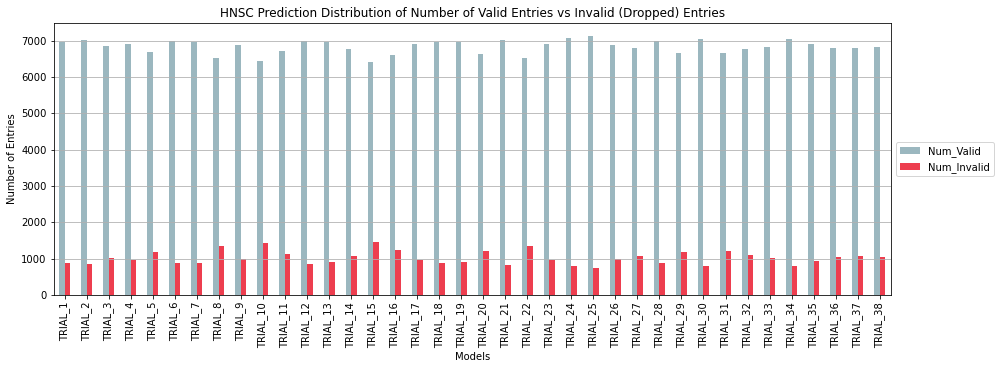

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("hnsc")

2022-06-17 10:07:14 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


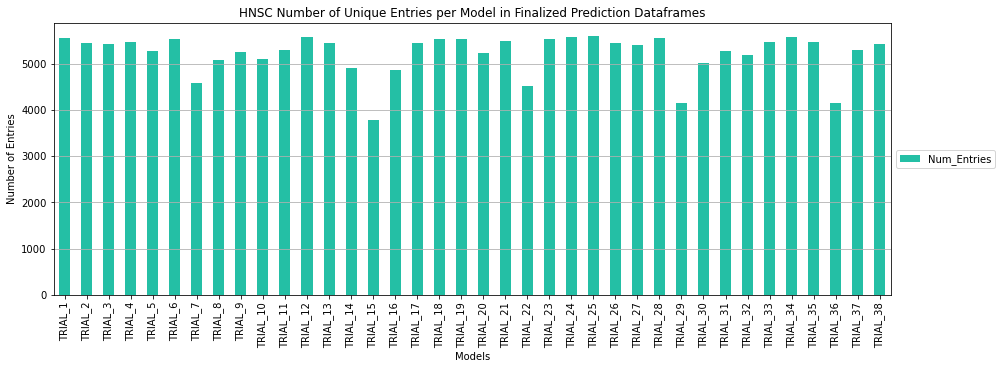

In [14]:
predator.predictions.plot_num_finalized_predictions("hnsc")

In [15]:
display_data(predator.predictions['hnsc_finalized_prediction_dataframes'][0])

Data dimensions: (5549, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.638235,Q13485,R361H,B7Z5N5
1,0.542792,Q13485,R361H,Q68DB7
2,0.673073,Q13485,R361H,Q53XR6


In [16]:
predator.prepare_ensemble_prediction_data()

2022-06-17 10:07:14 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 10:07:14 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for hnsc taking median ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 10:14:32 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for hnsc is prepared.
Accessible from `hnsc_predictions_prob_data`.
2022-06-17 10:14:32 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for hnsc is prepared.
Accessible from `hnsc_ensemble_prediction_data`.
2022-06-17 10:14:32 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for hnsc.
Accessible from predictions.['hnsc_prediction_results']
2022-06-17 10:14:32 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for hnsc.
Accessible from predictions.['hnsc_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['hnsc_predictions_prob_data'])

Data dimensions: (4137, 40)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,Trial 37,PROB_1s_AVG,VOTED_PREDICTION
0,0.638235,0.524953,0.688443,0.555948,0.586142,0.526022,0.45076,0.638429,0.587364,0.500977,...,0.39324,0.525868,0.553638,0.724792,0.622211,0.075,0.435405,0.418469,0.55795,1
1,0.542792,0.515874,0.485479,0.500664,0.563485,0.504564,0.45076,0.471442,0.580275,0.514769,...,0.42389,0.458358,0.542577,0.614454,0.612171,0.075,0.406451,0.415206,0.51532,1
2,0.673073,0.561134,0.771093,0.617096,0.663872,0.624969,0.45076,0.666917,0.604658,0.706299,...,0.648387,0.692024,0.671519,0.715193,0.602333,0.75,0.517459,0.464131,0.65254,1


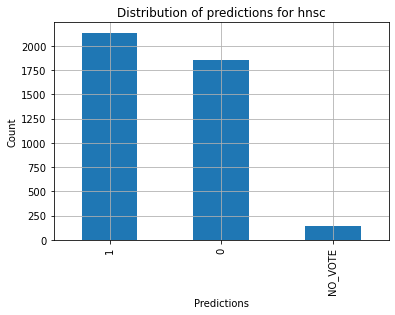

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("hnsc")

In [19]:
hnsc_prediction_results_soft = predator.predictions['hnsc_prediction_results']
display_data(hnsc_prediction_results_soft)

Data dimensions: (4137, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,Q13485,R361H,B7Z5N5,1
1,Q13485,R361H,Q68DB7,1
2,Q13485,R361H,Q53XR6,1


In [20]:
hnsc_prediction_results_soft_no_votes_dropped = predator.predictions["hnsc_prediction_results_no_votes_dropped"]
display_data(hnsc_prediction_results_soft_no_votes_dropped)

Data dimensions: (3990, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,Q13485,R361H,B7Z5N5,1
1,Q13485,R361H,Q68DB7,1
2,Q13485,R361H,Q53XR6,1


Label counts:
Increasing + No Effect    1855
Disrupting                2135
Name: Prediction, dtype: int64


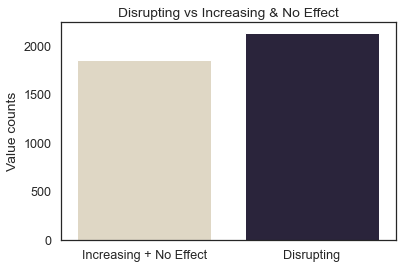

In [21]:
visualize_label_counts(hnsc_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
hnsc_ensemble_prediction_data_soft = predator.predictions["hnsc_ensemble_prediction_data"]

In [23]:
hnsc_predictions_prob_data_soft = predator.predictions["hnsc_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
hnsc_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["hnsc_prediction_results"],
    predictions_prob_data=predator.predictions["hnsc_predictions_prob_data"]
)
hnsc_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,Q13485,R361H,B7Z5N5,1,0.55795
1,Q13485,R361H,Q68DB7,1,0.51532
2,Q13485,R361H,Q53XR6,1,0.65254
3,Q9Y566,R2148H,Q9BYB0,1,0.83425
4,O15116,L87I,Q9Y333,0,0.192


In [26]:
hnsc_prediction_results_soft_no_votes_dropped_with_median_probabilities = hnsc_prediction_results_soft_with_median_probs[
    hnsc_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(hnsc_prediction_results_soft_no_votes_dropped_with_median_probabilities)

3990

## Exporting Predictions

In [28]:
# hnsc_prediction_results = hnsc_prediction_results_hard_no_votes_dropped
# hnsc_prediction_results = hnsc_prediction_results_soft_no_votes_dropped
hnsc_prediction_results = hnsc_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(hnsc_prediction_results)

Data dimensions: (3990, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,Q13485,R361H,B7Z5N5,1,0.55795
1,Q13485,R361H,Q68DB7,1,0.51532
2,Q13485,R361H,Q53XR6,1,0.65254


In [29]:
predator.export_prediction(
    tcga="hnsc",
    data=hnsc_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-06-17 10:15:27 | DEBUG    | helpers.helpers_predator.common | Folder with ID 76f498d9 is created.
2022-06-17 10:15:27 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder hnsc_prediction_2022-06-17\76f498d9..
2022-06-17 10:15:27 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/hnsc_prediction_2022-06-17\76f498d9\predictions_soft_2022-06-17.csv is exported successfully.
2022-06-17 10:15:27 | INFO     | helpers.helpers_predator.common | Config is exported.


---